# Decorators

As we saw previously, functions can take any number of arguments, and the arguments themselves can be of any type. This means we can also pass a function as an argument to another function. Decorators in Python are functions that take another function as an argument, modifying its behavior without changing its structure.

First, let us define a normal, simple function:

In [1]:
def somefunc(name, surname):
    print("Now we are inside 'somefunc'")
    return name + " " + surname

somefunc("John", "Smith")

This function takes in two arguments and returns them joined by a space.

Let us now see how this function can be passed to a decorator:

In [2]:
def generic_decorator(f):
    x = "Hello "
    y = ", it is good to see you."
    def wrapper(name,surname):
        print("Inside wrapper.")
        print("These are the arguments that were passed to 'wrapper':",name,surname)
        return x + f(name,surname) + y # Argument can be anything.
    return wrapper

# Now comes the weird part:

@generic_decorator
def func(name,surname):
    print("Now we are inside 'func'.")
    return name + " " + surname

func("John","Smith")

The "generic_decorator" function takes in a function "f" as an argument. Inside it, there is another function called "wrapper". When we use the "@decorator" notation, what we are doing is we are passing "func" to "generic_decorator", while func's arguments, "name" and "surname", get passed to "wrapper". Now when we call "func", the contents of "func" are executed from within the "wrapper" function, meaning that we get the output of both "wrapper" and "func".

# Generators

So far we have seen several ways of generating some output, for example list comprehensions and functions. These are very powerful and efficient tools, but in certain contexts, they may have some drawbacks: for example, if you needed to perform a certain operation a billion times, your PC or server may not have enough memory to work with all data. In this case, generators would be a better tool.

Generators have two distinctive qualities:

* They do not store any values in memory
* They are iterable

There are two ways generators can be defined, one similar to list comprehensions, the other similar to normal functions:

In [3]:
my_first_generator = (i for i in range(10))

The one shown above is a **generator**. It is defined with exactly the same syntax as list comprehensions, except it uses round ("()") instead of square ("\[\]") parentheses. Unlike with list comprehensions, if you were to print it now you would not see its contents:

In [4]:
print(my_first_generator)

That is because, at the moment, it simply has no contents. As previously stated, generators hold no values in memory, meaning that until you do something with them, they are in fact empty. If we want to interact with the contents, we have to do something to it, for example using a function like "max":

In [5]:
max(my_first_generator)

One important thing to note is that generators defined this way can only be used once: after they have been used, they are left empty.

In [6]:
max(my_first_generator)

ValueError: max() arg is an empty sequence

The other way to define generators is shown below:

In [26]:
def my_second_generator():
    for i in range(10):
        yield i
        
max(my_second_generator())

9

This looks like a normal function, however, instead of using **return**, we used **yield**. When we use **return**, Python treats the block of code as a function, when we use **yield** it treats it as a generator, as demonstrated below: 

In [27]:
def another_generator():
    for i in range(5):
        yield i
        
print(list(another_generator()))

[0, 1, 2, 3, 4]


The main difference between them is that **yield** will not cause the function to stop execution.
This means we can have multiple **yield** statements in a single generator:

In [28]:
def another_generator():
    for i in range(5):
        yield i
        yield i*i
        
print(list(another_generator()))

[0, 0, 1, 1, 2, 4, 3, 9, 4, 16]


Note that generators defined this way are also single-use objects:

In [29]:
somegen = another_generator()

max(somegen)

16

In [30]:
max(somegen)

ValueError: max() arg is an empty sequence

Individual items from a generators can be accessed using **next**:

In [31]:
newgen = (i for i in range(10))

print(next(newgen))
print(next(newgen))
print(next(newgen))

0
1
2


# Timing code

Occasionally, it may be necessary to measure the performance of a certain block of code to compare its execution time to a potential alternative. There are several ways in which we can do this. In Jupyter Notebooks, we can simply use %timeit:

In [32]:
%timeit sum([i for i in range(10**5)])

3.62 ms ± 34.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Another way is to use the **time** or **timeit** libraries:

In [33]:
import time
from timeit import default_timer

In [34]:
a = default_timer()            # Time immediately before execution
sum([i for i in range(10**5)]) # Code to be timed
b = default_timer()            # Time immediately after execution
b - a                          # Time difference

0.004039332998218015

In [35]:
a = time.time()
sum([i for i in range(10**5)])
b = time.time()
b - a

0.004140377044677734

Generally these methods will give slightly different results. The important thing is that when comparing times, you always use the same method.

# A few more words about functions: \*args and \*\*kwargs

So far, we have seen that functions can take no arguments, a single argument, or multiple arguments. The way we have defined functions until now, however, requires that the number of arguments be predefined: if we write a function to accept two arguments, then it will only ever be able to accept two arguments.

It is sometimes necessary to write functions that can take an arbitrary number of arguments. This can be done as follows:

In [36]:
def printsomestuff(*args):
    for i in args:
        print(i)

In [37]:
printsomestuff("hello")
printsomestuff("hello world")

hello
hello world


Notice the syntax, \*args. The asterisk is what makes it possible to have an arbitrary number of arguments by unpacking them. The word "args" is commonly used in these contexts, but in principle it can have any name, provided it is preceded by an asterisk.

The same thing can be done with keyword arguments, except in this case we will use two asterisks, as we have two things to unpack: keywords, and values. Again, "kwargs" is commonly used, but you can call it anything you want, as long as it is preceded by two asterisks.

In [38]:
def dontknow(**kwargs):
    for key, value in kwargs.items():
        print("Key: ",key, "Value:", value)

In [39]:
dontknow(name="John",age=30,job="Bus driver")

Key:  name Value: John
Key:  age Value: 30
Key:  job Value: Bus driver


# More Plotting, and Pivot Tables

Some libraries come with built in datasets for testing. One such library is Seaborn, which is built on top of Python's de-facto standard plotting library, matplotib.

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
titanic = sns.load_dataset("titanic")

In [42]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


The famous Titanic dataset as imported from Seaborn is in the form of a Pandas DataFrame. 

When analyzing data, it is often a good idea to convert text to numerical values. Let us convert "sex" from "female/male" to 0/1.

In [43]:
titanic["sex"] = [
    0 if i == "female"
    else 1
    for i in titanic["sex"]
]

In [44]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Pivot Tables

In Pandas you can easily create pivot tables using the .pivot_table() method.

In [45]:
titanic.pivot_table(values="survived", index="sex", columns="class", aggfunc="count")

class,First,Second,Third
sex,,,
0,94,76,144
1,122,108,347


In this example, we used the following options:

* values: tell Pandas which column from our DataFrame we are interested in (in this case, survived)
* index: the column we want to group our values by, to be shown in the pivot table as rows
* columns: the column(s) we want to group our values by, to be shown in the pivot table as columns
* aggfunc: the function we want to apply to our values (e.g. count, mean, median, max, min...)

### More plotting

In [46]:
import plotly.express as px
px.histogram(titanic,"fare")

Here, we can see that it is very easy to create a histogram using plotly: just call px.histogram(), and pass it as arguments your DataFrame, and the name of the column you want to visualize. A histogram will give us a general idea of how the values in our specified column are distributed.

Let us now try something slightly more advanced: we will create a visualization to show survival rate for men and woman in different passenger classes. To do this, we will need to create different groups: men in 1st, 2nd, and 3rd class, and women in 1st, 2nd, and 3rd class.

We can do this easily, harnessing the power of list comprehensions:

In [47]:
# Women who survived

women1fare = [
    titanic.loc[(titanic["sex"] == 0) &                       # Here we select all rows with
                (titanic["survived"] == 1) &                  # by "sex", "survived", and "pclass"
                (titanic["pclass"] == i)]["survived"].count() # and count the total number of rows.
    for i in [1,2,3] # And here we iterate through all possible values of pclass (1,2,3).
]

# Men who survived

men1fare = [
    titanic.loc[(titanic["sex"] == 1) &                       # As above, just this time we change
                (titanic["survived"] == 1) &                  # to sex == 1.
                (titanic["pclass"] == i)]["survived"].count()
    for i in [1,2,3]
]

# Women who did not survive

women0fare = [                                                # Sex == 0 and survived == 0.
    titanic.loc[(titanic["sex"] == 0) &
                (titanic["survived"] == 0) &
                (titanic["pclass"] == i)]["survived"].count()
    for i in [1,2,3]
]

# Men who did not survive

men0fare = [
    titanic.loc[(titanic["sex"] == 1) &                       # Sex == 1 and survived == 0.
                (titanic["survived"] == 0) &
                (titanic["pclass"] == i)]["survived"].count()
    for i in [1,2,3]
]

print(women0fare)
print(women1fare)
print(men0fare)
print(men1fare)

[3, 6, 72]
[91, 70, 72]
[77, 91, 300]
[45, 17, 47]


Now we have the total number of passengers split by sex, passenger class, and survival.

Let us now plot a stacked bar chart of the results.

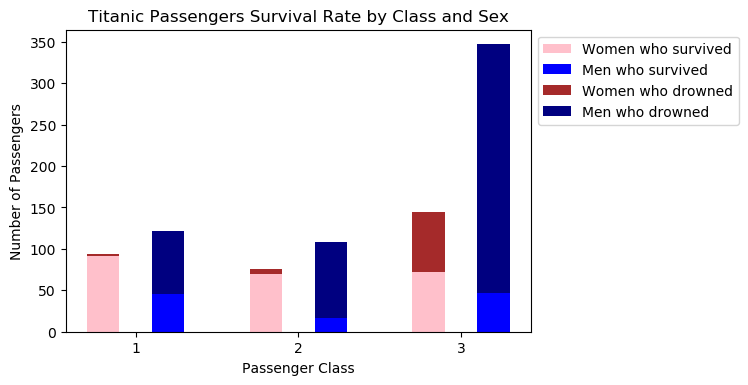

In [48]:
plt.figure(dpi=100) # Optional - a higher number will result in a larger picture.

plt.title("Titanic Passengers Survival Rate by Class and Sex") # Title.

# With plt.bar() we plot bar charts. The first argument is the position of the bars
# on the x axis, the second argument is the bar heights. Width is bar width,
# color is bar color, label is the label that will be displayed in the legend.

plt.bar([0.8, 1.8, 2.8], women1fare, width=0.2, color="pink", label="Women who survived")
plt.bar([1.2, 2.2, 3.2], men1fare, width=0.2, color="blue", label="Men who survived")

# Here we have added a new keyword: "bottom". This means that these bars
# will not start from y=0, but from the values that we pass it.

plt.bar([0.8, 1.8, 2.8], women0fare, bottom=women1fare, width=0.2, color="brown", label="Women who drowned")
plt.bar([1.2, 2.2, 3.2], men0fare, bottom=men1fare, width=0.2, color="navy", label="Men who drowned")

# With plt.legend() we display the bar labels. bbox_to_anchor is an optional
# keyword to manually relocate the legend box to the specified coordinates.

plt.legend(bbox_to_anchor=(1,1)) # bbox_to_anchor is to move the legend arbitrarily

# plt.xticks() lets us choose where we want the ticks on the x axis to be displayed.
plt.xticks([1,2,3])

# plt.xlabel()/.ylabel() let us display some text to label the axes.
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")

plt.show()

Another library that comes with some datasets bundled in is scikit-learn, one of Python's most famous machine learning libraries.

In [49]:
from sklearn.datasets import load_boston

In [50]:
boston = load_boston()

The boston dataset does not come as a Pandas DataFrame by default, so we will turn it into one.

In [51]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [52]:
import pandas as pd

In [53]:
df = pd.DataFrame(boston["data"], columns = boston["feature_names"])

df["target"] = boston["target"]

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


With Seaborn's **regplot** we can easily create a scatter plot which includes a linear regression.

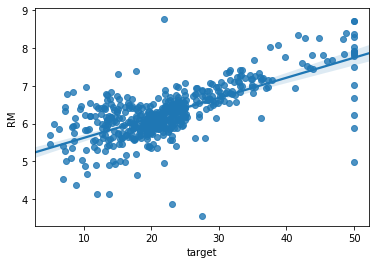

In [54]:
sns.regplot(df["target"],df["RM"])

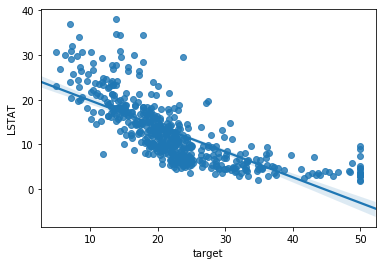

In [55]:
sns.regplot(df["target"],df["LSTAT"])

Sometimes linear regression is not the best tool to model our data. In the example above, we can clearly see that the trend is not linear. A polynomial regression might be more appropriate in this case.

In [56]:
import numpy as np
from scipy import polyfit, polyval # With these two we will create a polynomial.

In [57]:
xrange = np.linspace(0,55,100) # This creates a range of equally spaced values from 0 to 55.

poly = polyval( # This calculates values for the specified polynomial function (y axis)
    polyfit(df["target"],df["LSTAT"],3), # This returns the polynomial function with the given degree.
    xrange # These are the corresponding values of x.
)

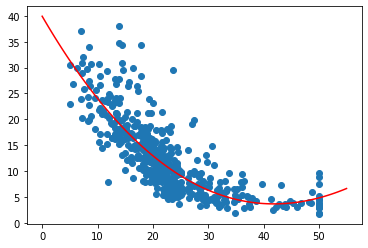

In [58]:
plt.scatter(df["target"],df["LSTAT"]) # Scatter plot.

plt.plot(xrange, poly, color="red") # Visualizing regression.

plt.show()

# Further reading

Python is a powerful language that can be found in several environments. Depending on what you want to do with it, there are different instruments you may want to learn about. Below is a list of recommended tools for different purposes:

## Web Development

* **Flask** (easy, small projects)

* **Django** (advanced, big projects)

## Video Games

* **Pygame** (simple 2D games)

* **Panda3D**, **Blender** (slightly more advanced, but much more powerful)

* **Godot** (uses GDScript, not exactly Python, but almost)

## Graphical User Interfaces (GUIs)

* **Tkinter**

## Data Science

* **Pandas** (data up to 1-2 GB)
* **Dask** (bigger datasets)
* **PySpark** (big data)

## Data Science - Machine Learning/Deep Learning

* **scikit-learn** (Machine Learning)
* **TensorFlow / Keras** (Deep Learning, easy, not very customizable)
* **PyTorch** (Deep Learning, not so easy, very customizable)

## Data Science - Natural Language Processing

* **nltk** (basic NLP tools and corpora)
* **spaCy** (Named Entity Recognition, Part of Speech tagging (noun, verb...), etc)
* **gensim** (Word Embeddings)